## PART 1 (COMPUTING ROLLING MEAN AND DUMMY ENCODING)

#### Loading the relevant Libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### 1) Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function.

#### Loading the dataset:

In [2]:
from nsepy import get_history
from datetime import date
data_infy=get_history(symbol='infy',start=date(2015,1,1),end=date(2016,1,1))
data_tcs=get_history(symbol='tcs',start=date(2015,1,1),end=date(2016,1,1))

#### 1.1) Moving average for Infosys :

##### 1.1.1) Elementary Data Preprocessing:

In [3]:
#creating an additional date column in the dataframe:
data_infy['Date']=data_infy.index
#dropping date as the index and resetting the index:
data_infy.reset_index(drop=True,inplace=True)
#changing the dtype of the date column:
data_infy['Date']=pd.to_datetime(data_infy['Date'])
#adding a new column by extracting the week from each date
data_infy['week']=data_infy['Date'].dt.week.values
data_infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,week
0,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01,1
1,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02,1
2,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,2015-01-05,2
3,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2015-01-06,2
4,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2015-01-07,2


###### 1.1.2) Function for obtaining the moving average of the closing price for Infosys :

In [4]:
def rolling_avg_infosys(count):
    #count represents the numbers of weeks for which we have to compute the moving average
    mean=[]
    week=[]
    #here we have used the pandas groupby method to cluster the weekly avergae of closing prices 
    for weekly,df_week in data_infy.groupby('week'):
        mean.append(df_week['Close'].mean())
        week.append(weekly)
    weekly_avg=pd.DataFrame(data={'week':week,'closing_mean':mean})
    #in this step we have computed the rolling mean/moving average:
    weekly_avg['rolling_average']=weekly_avg['closing_mean'].rolling(count).mean()
    return weekly_avg.head(count+5)

In [5]:
#computing the rolling mean of infosys stock's closing price for 3 weks
rolling_avg_infosys(3)

,closing_mean,week,rolling_average
0,1993.8000,1,NaN
1,1992.3100,2,NaN
2,2117.2100,3,2034.440000
3,2161.6200,4,2090.380000
4,2142.1125,5,2140.314167
5,2164.9800,6,2156.237500
6,2283.8700,7,2196.987500
7,2295.7625,8,2248.204167


#### 1.2) Moving Average for TCS:

##### 1.2.1) Elementary Data Preprocessing:

In [6]:
#creating an additional date column in the dataframe:
data_tcs['Date']=data_tcs.index
#dropping date as the index and resetting the index:
data_tcs.reset_index(drop=True,inplace=True)
#changing the dtype of the date column:
data_tcs['Date']=pd.to_datetime(data_tcs['Date'])
#adding a new column by extracting the week from each date
data_tcs['week']=data_tcs['Date'].dt.week.values
data_tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,week
0,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,2015-01-01,1
1,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2015-01-02,1
2,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2015-01-05,2
3,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2015-01-06,2
4,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2015-01-07,2


#### 1.1.2) Function for obtaining the moving average of the closing price for TCS :

In [7]:
#rolling mean
def rolling_avg_tcs(count):
    mean=[]
    week=[]
    for weekly,df_week in data_tcs.groupby('week'):
        mean.append(df_week['Close'].mean())
        week.append(weekly)
    weekly_avg=pd.DataFrame(data={'week':week,'closing_mean':mean})
    weekly_avg['rolling_average']=weekly_avg['closing_mean'].rolling(count).mean()
    return weekly_avg.head(count+5)

In [8]:
rolling_avg_tcs(8)

,closing_mean,week,rolling_average
0,2562.500000,1,NaN
1,2472.130000,2,NaN
2,2520.160000,3,NaN
3,2508.480000,4,NaN
4,2517.087500,5,NaN
5,2542.980000,6,NaN
6,2482.970000,7,NaN
7,2644.262500,8,2531.321250
8,2677.941667,9,2545.751458
9,2721.962500,10,2576.980521


### 3. Create the following dummy time series:


### 3.1 Volume shocks - If volume traded is 10% higher/lower than previous day - make a 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.

#### 3.1.1) For TCS:

In [9]:
#creating a timeseries data of traded volume
volume_day1=data_tcs.loc[0:247,['Volume','Date']]
volume_day2=data_tcs.loc[1:248,['Volume','Date']]
df_volume=pd.DataFrame(data={'Volume_day1':volume_day1['Volume'].values,'Volume_day2':volume_day2['Volume'].values,
                            'date_closing':volume_day2['Date'].values})

In [10]:
#checking the data
df_volume.head()

,Volume_day1,Volume_day2,date_closing
0,183415,462870,2015-01-02
1,462870,877121,2015-01-05
2,877121,1211892,2015-01-06
3,1211892,1318166,2015-01-07
4,1318166,782704,2015-01-08


In [11]:
volume_boost=(df_volume['Volume_day2']-df_volume['Volume_day1'])/df_volume['Volume_day1']
df_volume['volume_boost']=volume_boost
df_volume.head()

,Volume_day1,Volume_day2,date_closing,volume_boost
0,183415,462870,2015-01-02,1.523621
1,462870,877121,2015-01-05,0.894962
2,877121,1211892,2015-01-06,0.381670
3,1211892,1318166,2015-01-07,0.087693
4,1318166,782704,2015-01-08,-0.406217


#### Dummy encoding

In [12]:
for count in range(248):
    #volume shock
    if df_volume.loc[count,'volume_boost']>=0.10:
        df_volume.loc[count,'volume_shock']=0
    else:
        df_volume.loc[count,'volume_shock']=1
    #directional_shock
    if df_volume.loc[count,'volume_boost']>=0:
        df_volume.loc[count,'directional_shock']=0
    else:
        df_volume.loc[count,'directional_shock']=1
#desired dataset
df_volume.head()

,Volume_day1,Volume_day2,date_closing,volume_boost,volume_shock,directional_shock
0,183415,462870,2015-01-02,1.523621,0.0,0.0
1,462870,877121,2015-01-05,0.894962,0.0,0.0
2,877121,1211892,2015-01-06,0.381670,0.0,0.0
3,1211892,1318166,2015-01-07,0.087693,1.0,0.0
4,1318166,782704,2015-01-08,-0.406217,1.0,1.0


#### 3.2.2) For Infosys:

In [13]:
#creating a timeseries data of traded volume
volume_day1=data_infy.loc[0:247,['Volume','Date']]
volume_day2=data_infy.loc[1:248,['Volume','Date']]
df_volume=pd.DataFrame(data={'Volume_day1':volume_day1['Volume'].values,'Volume_day2':volume_day2['Volume'].values,
                            'date_closing':volume_day2['Date'].values})
df_volume.head()

,Volume_day1,Volume_day2,date_closing
0,500691,1694580,2015-01-02
1,1694580,2484256,2015-01-05
2,2484256,2416829,2015-01-06
3,2416829,1812479,2015-01-07
4,1812479,3391230,2015-01-08


In [14]:
#creating a column representing variation in traded volume:
volume_boost=(df_volume['Volume_day2']-df_volume['Volume_day1'])/df_volume['Volume_day1']
df_volume['volume_boost']=volume_boost
df_volume.head()

,Volume_day1,Volume_day2,date_closing,volume_boost
0,500691,1694580,2015-01-02,2.384483
1,1694580,2484256,2015-01-05,0.466001
2,2484256,2416829,2015-01-06,-0.027142
3,2416829,1812479,2015-01-07,-0.250059
4,1812479,3391230,2015-01-08,0.871045


#### Dummy Encoding :

In [15]:
for count in range(248):
    #volume shock
    if df_volume.loc[count,'volume_boost']>=0.10:
        df_volume.loc[count,'volume_shock']=0
    else:
        df_volume.loc[count,'volume_shock']=1
    #directional_shock
    if df_volume.loc[count,'volume_boost']>=0:
        df_volume.loc[count,'directional_shock']=0
    else:
        df_volume.loc[count,'directional_shock']=1
#desired dataset
df_volume.head()

,Volume_day1,Volume_day2,date_closing,volume_boost,volume_shock,directional_shock
0,500691,1694580,2015-01-02,2.384483,0.0,0.0
1,1694580,2484256,2015-01-05,0.466001,0.0,0.0
2,2484256,2416829,2015-01-06,-0.027142,1.0,1.0
3,2416829,1812479,2015-01-07,-0.250059,1.0,1.0
4,1812479,3391230,2015-01-08,0.871045,0.0,0.0





### 3.2 Price shocks - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.


#### 3.2.1) For TCS

In [16]:
#creating a time series of closing prices
closing_day1=data_tcs.loc[0:247,['Close','Date']]
closing_day2=data_tcs.loc[1:248,['Close','Date']]
df_close=pd.DataFrame(data={'closing_day1':closing_day1['Close'].values,'closing_day2':closing_day2['Close'].values,
                            'date_closing':volume_day2['Date'].values})
df_close.head()

,closing_day1,closing_day2,date_closing
0,2545.55,2579.45,2015-01-02
1,2579.45,2540.25,2015-01-05
2,2540.25,2446.60,2015-01-06
3,2446.60,2417.70,2015-01-07
4,2417.70,2443.80,2015-01-08


In [17]:
#creating a column representing variation in closing prices:
close_boost=(df_close['closing_day2']-df_close['closing_day1'])/df_close['closing_day1']
df_close['closing_boost']=close_boost
df_close.head()

,closing_day1,closing_day2,date_closing,closing_boost
0,2545.55,2579.45,2015-01-02,0.013317
1,2579.45,2540.25,2015-01-05,-0.015197
2,2540.25,2446.60,2015-01-06,-0.036866
3,2446.60,2417.70,2015-01-07,-0.011812
4,2417.70,2443.80,2015-01-08,0.010795


#### Dummy Encoding

In [18]:
for count in range(248):
    #closing shock
    if df_close.loc[count,'closing_boost']>=0.02:
        df_close.loc[count,'closing_shock']=0
    else:
        df_close.loc[count,'closing_shock']=1
    #directional_shock
    if df_close.loc[count,'closing_boost']>=0:
        df_close.loc[count,'directional_shock']=0
    else:
        df_close.loc[count,'directional_shock']=1
#desired dataset
df_close.head()

,closing_day1,closing_day2,date_closing,closing_boost,closing_shock,directional_shock
0,2545.55,2579.45,2015-01-02,0.013317,1.0,0.0
1,2579.45,2540.25,2015-01-05,-0.015197,1.0,1.0
2,2540.25,2446.60,2015-01-06,-0.036866,1.0,1.0
3,2446.60,2417.70,2015-01-07,-0.011812,1.0,1.0
4,2417.70,2443.80,2015-01-08,0.010795,1.0,0.0


#### 3.2.2) For Infosys:

In [19]:
#creating a time series of closing prices
closing_day1=data_infy.loc[0:247,['Close','Date']]
closing_day2=data_infy.loc[1:248,['Close','Date']]
df_close=pd.DataFrame(data={'closing_day1':closing_day1['Close'].values,'closing_day2':closing_day2['Close'].values,
                            'date_closing':volume_day2['Date'].values})
df_close.head()

,closing_day1,closing_day2,date_closing
0,1974.40,2013.20,2015-01-02
1,2013.20,1995.90,2015-01-05
2,1995.90,1954.20,2015-01-06
3,1954.20,1963.55,2015-01-07
4,1963.55,1973.45,2015-01-08


In [20]:
#creating a column representing variation in closing prices:
close_boost=(df_close['closing_day2']-df_close['closing_day1'])/df_close['closing_day1']
df_close['closing_boost']=close_boost
df_close.head()

,closing_day1,closing_day2,date_closing,closing_boost
0,1974.40,2013.20,2015-01-02,0.019652
1,2013.20,1995.90,2015-01-05,-0.008593
2,1995.90,1954.20,2015-01-06,-0.020893
3,1954.20,1963.55,2015-01-07,0.004785
4,1963.55,1973.45,2015-01-08,0.005042


#### Dummy Encoding

In [21]:
for count in range(248):
    #closing shock
    if df_close.loc[count,'closing_boost']>=0.02:
        df_close.loc[count,'closing_shock']=0
    else:
        df_close.loc[count,'closing_shock']=1
    #directional_shock
    if df_close.loc[count,'closing_boost']>=0:
        df_close.loc[count,'directional_shock']=0
    else:
        df_close.loc[count,'directional_shock']=1
#desired dataset
df_close.head()

,closing_day1,closing_day2,date_closing,closing_boost,closing_shock,directional_shock
0,1974.40,2013.20,2015-01-02,0.019652,1.0,0.0
1,2013.20,1995.90,2015-01-05,-0.008593,1.0,1.0
2,1995.90,1954.20,2015-01-06,-0.020893,1.0,1.0
3,1954.20,1963.55,2015-01-07,0.004785,1.0,0.0
4,1963.55,1973.45,2015-01-08,0.005042,1.0,0.0


## PART2 GRAPHICAL VISUALIZATIONS THROUGH BOKEH

#### Plotting the time series of closing prices for Infosys

In [22]:
from bokeh.plotting import figure,show
plot=figure(plot_width=500,plot_height=500,title='closing_price_timeseries')
plot.line(x=closing_day1['Date'],y=closing_day1['Close'],line_width=3)
show(plot)

## PART 3 (REGRESSION THROUGH SCIKIT-LEARN)

#### Predicting the closing price of Infosys stock for tomorrow:

#### importing the dataset:

In [23]:
from nsepy import get_history
from datetime import date
data_infy=get_history(symbol='infy',start=date(2015,1,1),end=date(2018,10,7))

In [24]:
data_infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


#### Data Preprocessing:

In [25]:
#creating an additional date column in the dataframe:
data_infy['Date']=data_infy.index
#dropping date as the index and resetting the index:
data_infy.reset_index(drop=True,inplace=True)
#changing the dtype of the date column:
data_infy['Date']=pd.to_datetime(data_infy['Date'])

In [26]:
data_infy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 15 columns):
Symbol                932 non-null object
Series                932 non-null object
Prev Close            932 non-null float64
Open                  932 non-null float64
High                  932 non-null float64
Low                   932 non-null float64
Last                  932 non-null float64
Close                 932 non-null float64
VWAP                  932 non-null float64
Volume                932 non-null int64
Turnover              932 non-null float64
Trades                932 non-null int64
Deliverable Volume    932 non-null int64
%Deliverble           932 non-null float64
Date                  932 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 109.3+ KB


In [27]:
data_infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
0,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,2015-01-01
1,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2015-01-02
2,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,2015-01-05
3,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,2015-01-06
4,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,2015-01-07


#### 3.1) Performing Linear Regression

0.9628984365984088


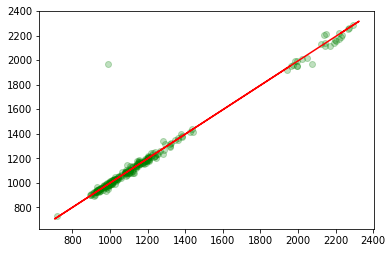

In [28]:
closing_previous=data_infy.loc[0:927:,['Close','Date']]
closing_next=data_infy.loc[1:928,['Close','Date']]
infy_closing=pd.DataFrame(data={'closing1':closing_previous['Close'].values,'closing2':closing_next['Close'].values,'date':closing_next['Date'].values})
infy_closing

#splitting the dataframe into input and target features
input_features=infy_closing['closing1'].values.reshape(928,1)
target_feature=infy_closing['closing2'].values.reshape(928,1)

#creating the training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_features,target_feature,test_size=0.25)

#fitting the linear regression model to the data
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred=linreg.predict(X_test)

#evaluating the model performance
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

#prodducing the scatter plot
plt.scatter(Y_test,Y_pred,color='green',alpha=0.25)
plt.plot(X_train,linreg.predict(X_train),color='red')

#### Predicting the closing price for tomorrow:

In [29]:
linreg.predict(data_infy.loc[931,'Close'])

array([[726.00941946]])

#### 3.2) Performing Ridge Regression (without tuned hyperparameters)

0.9616073529765488


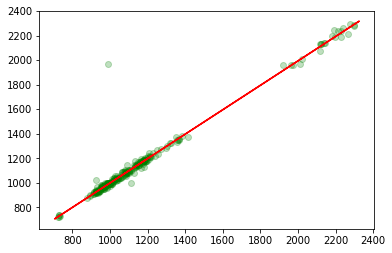

In [30]:
closing_previous=data_infy.loc[0:927:,['Close','Date']]
closing_next=data_infy.loc[1:928,['Close','Date']]
infy_closing=pd.DataFrame(data={'closing1':closing_previous['Close'].values,'closing2':closing_next['Close'].values,'date':closing_next['Date'].values})
infy_closing

#splitting the dataframe into input and target features
input_features=infy_closing['closing1'].values.reshape(928,1)
target_feature=infy_closing['closing2'].values.reshape(928,1)

#creating the training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_features,target_feature,test_size=0.25)

#fitting the linear regression model to the data
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train,Y_train)
Y_pred=ridge_reg.predict(X_test)

#evaluating the model performance
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

#prodducing the scatter plot
plt.scatter(Y_test,Y_pred,color='green',alpha=0.25)
plt.plot(X_train,linreg.predict(X_train),color='red')

#### Predicting the closing price for tomorrow 

In [31]:
ridge_reg.predict(data_infy.loc[931,'Close'])

array([[725.78419092]])

#### 3.2) Performing Parameter tuning on Ridge Regressor

In [32]:
closing_previous=data_infy.loc[0:927:,['Close','Date']]
closing_next=data_infy.loc[1:928,['Close','Date']]
infy_closing=pd.DataFrame(data={'closing1':closing_previous['Close'].values,'closing2':closing_next['Close'].values,'date':closing_next['Date'].values})
infy_closing

#splitting the dataframe into input and target features
input_features=infy_closing['closing1'].values.reshape(928,1)
target_feature=infy_closing['closing2'].values.reshape(928,1)

#creating the training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(input_features,target_feature,test_size=0.25)

#fitting the linear regression model to the data
from sklearn.linear_model import Ridge
ridge_reg=Ridge()

#tuning the parameters
from sklearn.model_selection import GridSearchCV
hyperparams={'alpha':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19],
            'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
grid_object=GridSearchCV(estimator=ridge_reg,param_grid=hyperparams,cv=20,scoring='r2')
grid_object.fit(X_train,Y_train)

GridSearchCV(cv=20, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [33]:
grid_object.best_params_

{'alpha': 7, 'solver': 'sag'}

#### Choosing the obtained hyper-parameters combination for Ridge Regression 

0.9815832211299187


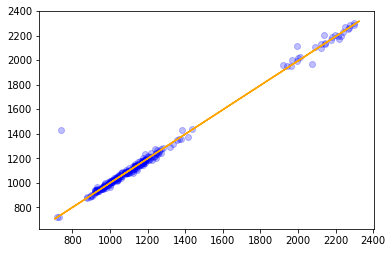

In [36]:
ridge_reg=Ridge(alpha=7,solver='sag')
ridge_reg.fit(X_train,Y_train)
Y_pred=ridge_reg.predict(X_test)

#evaluating the model performance
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

#prodducing the scatter plot
plt.scatter(Y_test,Y_pred,color='blue',alpha=0.25)
plt.plot(X_train,linreg.predict(X_train),color='orange')

We thus observe that parameter tuning has lead to a considerable imporvement in the quality of predictions.

#### Predicting the closing price for tomorrow:

In [35]:
ridge_reg.predict(data_infy.loc[931,'Close'])

array([[727.66697106]])